In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read data
train_raw_17 = pd.read_csv("train_pre_17_simple_ftrs.csv")
X_test_17 = pd.read_csv("test_pre_17_simple_ftrs.csv")
train_raw_13 = pd.read_csv("train_pre_13.csv")
X_test_13 = pd.read_csv("test_pre_13.csv")

# train_raw = pd.read_csv("train_pre_pure.csv")
# X_test = pd.read_csv("test_pre_pure.csv")

test_raw = pd.read_csv("test.csv")

In [13]:
train_raw_13.shape

(1516988, 87)

In [18]:
fraud_17 = train_raw_17.loc[train_raw_17["fraud_ind"].eq(1)]
print(fraud_17.columns.tolist())
fraud_17.iloc[:, 70:]

['acqic', 'bacno', 'cano', 'conam', 'csmcu', 'loctm', 'mcc', 'mchno', 'scity', 'stocn', 'loctm_hour', 'loctm_min', 'loctm_sec', 'conam_is_0', 'cocam_u_cnt_by_acqic', 'bacno_u_cnt_by_acqic', 'conam_level', 'loctm_value_counts', 'loctm_hour_value_counts', 'csmcu_cnt_by_stocn', 'csmcu_cnt_by_scity', 'csmcu_ucnt_by_bacno', 'bacno_value_counts', 'cano_value_counts', 'mchno_value_counts', 'acqic_value_counts', 'mcc_value_counts', 'contp_value_counts', 'etymd_value_counts', 'stocn_value_counts', 'scity_value_counts', 'stscd_value_counts', 'flbmk_value_counts', 'hcefg_value_counts', 'csmcu_value_counts', 'flg_3dsmk_value_counts', 'prime_time_normal', 'prime_time_fraud', 'sleep_time', 'sleep_time_conam_lower_3000', 'conam_mean_by_bacno', 'conam_mean_by_cano', 'conam_mean_by_mchno', 'conam_mean_by_acqic', 'conam_mean_by_mcc', 'conam_mean_by_loctm_hour', 'conam_mean_by_loctm_min', 'conam_mean_by_loctm_sec', 'conam_mean_by_stocn', 'conam_mean_by_scity', 'conam_mean_by_csmcu', 'loctm_cnt_mean_by_ba

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_7,latent_9,latent_10,latent_11,latent_12,latent_13,latent_14,latent_15,latent_16,fraud_ind
70,0.530,0.318,0.068,0.000,0.305,0.276,0.859,1.008,0.448,0.065,0.606,0.645,0.0,0.837,0.080,1
349,0.307,0.421,0.411,0.149,0.125,0.124,0.294,0.155,0.443,0.222,0.000,0.351,0.0,0.000,0.000,1
1133,0.274,0.323,0.217,0.106,0.327,0.093,0.818,0.755,0.000,0.095,0.422,0.297,0.0,0.419,0.000,1
1208,0.274,0.323,0.217,0.106,0.327,0.093,0.818,0.755,0.000,0.095,0.422,0.297,0.0,0.419,0.000,1
1254,0.307,0.421,0.411,0.149,0.125,0.124,0.294,0.155,0.443,0.222,0.000,0.351,0.0,0.000,0.000,1
1888,0.507,0.000,0.210,0.373,0.309,0.271,0.632,0.586,0.857,0.062,0.919,0.940,0.0,0.655,0.084,1
2090,0.357,1.467,1.247,0.538,1.015,1.185,0.455,0.133,0.866,0.529,1.464,0.437,0.0,0.383,0.494,1
2156,0.274,0.323,0.217,0.106,0.327,0.093,0.818,0.755,0.000,0.095,0.422,0.297,0.0,0.419,0.000,1
2465,0.203,0.121,0.448,0.516,0.207,0.000,0.212,0.054,0.377,0.409,0.351,0.444,0.0,0.000,0.035,1
3296,0.723,0.093,0.555,0.521,0.490,0.290,0.763,0.600,0.861,0.091,0.886,0.970,0.0,1.491,0.887,1


In [20]:
fraud_13 = train_raw_13.loc[train_raw_13["fraud_ind"].eq(1)]
fraud_13
fraud_13.iloc[:, 60:70]

# conam_mean_by_locdt

,bacno_cano_3_times_conam_sum,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean,bacno_cano_7_times_conam_max,bacno_cano_14_times_conam_mean,bacno_cano_7_times_prime_time_fraud_cnt,bacno_cano_7_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_locdt_tm_14_conam_pos_trend,bacno_cnt_by_locdt_loctm_hour
70,2250.95,2250.95,562.737500,1514.50,562.737500,4,2,2,8.144600e+01,2
349,1541.40,3384.27,564.045000,815.27,564.045000,5,0,0,0.000000e+00,1
1133,1707.30,4418.82,631.260000,677.88,679.811429,1,3,3,-6.225333e+00,15
1208,1072.87,2927.37,418.195714,543.58,335.764286,5,5,5,2.089267e+01,1
1254,1027.60,1027.60,513.800000,513.80,513.800000,2,2,2,0.000000e+00,1
1888,1654.53,4325.40,617.914286,1016.34,636.403571,7,0,0,3.350267e+01,2
2090,0.00,0.00,0.000000,0.00,0.000000,1,0,0,0.000000e+00,3
2156,1771.31,4425.63,632.232857,682.99,649.150000,0,7,7,-1.630067e+01,3
2465,810.86,1916.91,273.844286,592.25,296.569286,7,2,2,-1.450867e+01,1
3296,2270.30,2270.30,1135.150000,1619.15,1135.150000,2,0,0,3.226667e+02,2


In [21]:
not_fraud_13 = train_raw_13.loc[train_raw_13["fraud_ind"].eq(0)]
not_fraud_13.iloc[:, 60:70]

,bacno_cano_3_times_conam_sum,bacno_cano_7_times_conam_sum,bacno_cano_7_times_conam_mean,bacno_cano_7_times_conam_max,bacno_cano_14_times_conam_mean,bacno_cano_7_times_prime_time_fraud_cnt,bacno_cano_7_times_sleep_time_cnt,bacno_cano_7_sleep_time_conam_lower_3000_cnt,bacno_cano_locdt_tm_14_conam_pos_trend,bacno_cnt_by_locdt_loctm_hour
0,0.00,1222.42,174.631429,643.17,296.764286,6,0,0,-7.243333e+00,4
1,1396.86,4675.65,667.950000,1881.93,663.935714,2,0,0,-4.557600e+01,1
2,1755.99,4070.38,581.482857,776.57,687.089286,6,0,0,-1.369667e+01,1
3,2935.16,7288.13,1041.161429,1830.62,1099.043571,7,0,0,-1.684733e+01,2
4,1499.83,4179.69,597.098571,751.13,544.232143,7,1,1,7.562667e+00,1
5,1629.64,5289.27,755.610000,1804.53,763.130714,4,0,0,-6.426000e+00,1
6,3612.98,3612.98,1806.490000,1806.49,1806.490000,2,0,0,0.000000e+00,1
7,1396.86,4042.65,577.521429,967.09,600.250714,2,1,1,-1.118000e+00,1
8,2169.30,3326.71,665.342000,956.02,665.342000,3,2,2,1.736667e+00,1
9,1396.86,1396.86,465.620000,465.62,465.620000,0,0,0,0.000000e+00,1


### Random Under-Sampling to get balanced data

In [3]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_pre = train_pre.sample(frac=1)  # shuffle(train_pre)

# amount of fraud classes 18865 rows.
fraud_df = train_pre.loc[train_pre['fraud_ind'] == 1]
non_fraud_df = train_pre.loc[train_pre['fraud_ind'] == 0][:18865]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,acqic,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,ovrlt,scity,stocn,stscd,fraud_ind
629776,6540,943.22,5,61,Y,2,N,N,5,N,0,9,201816.0,288,N,6580,104,0,1
558931,6215,1016.34,5,62,Y,2,N,N,5,N,0,52,163507.0,289,N,3460,46,0,1
662474,3348,168.20,5,62,Y,8,N,N,5,N,0,2,102127.0,380,N,6580,38,2,1
27773,3348,443.90,5,62,Y,8,N,N,5,N,0,52,174113.0,289,N,3460,46,2,0
1117358,3348,324.99,5,49,Y,8,N,N,5,N,0,19,143221.0,288,N,6580,38,2,1


__Equally Distributing and Correlating:__

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: fraud_ind, dtype: float64


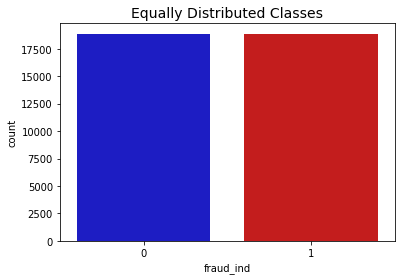

In [4]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['fraud_ind'].value_counts()/len(new_df))

colors = ["#0101DF", "#DF0101"]
sns.countplot('fraud_ind', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

__Correlation Matrices__

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

這個好像沒什麼用因為類別變數居多..

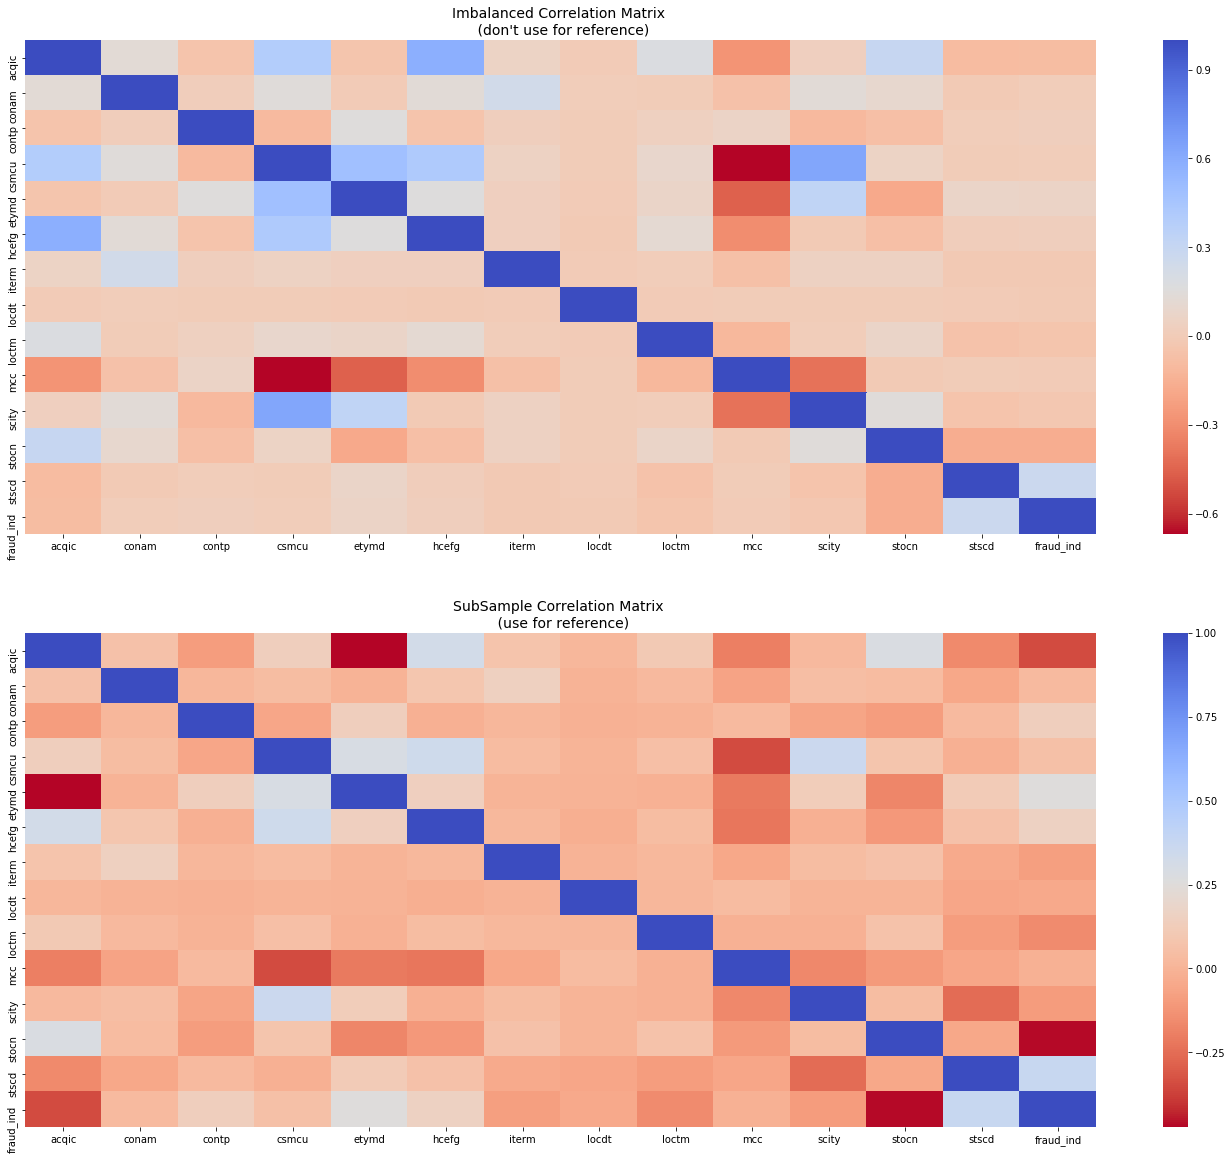

In [5]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = train_pre.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()